In [615]:
import math 
import numpy as np
from sklearn import linear_model 
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from os import mkdir 
import string
import random
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

## 1- Chargement des données "Galton.txt" avec Pandas

In [616]:
url = "https://bitbucket.org/portierf/shared_files/downloads/Galton.txt"
data = pd.read_table(url, sep = '\t', header = 0)
print(data.head())

  Family  Father  Mother Gender  Height  Kids
0      1    78.5    67.0      M    73.2     4
1      1    78.5    67.0      F    69.2     4
2      1    78.5    67.0      F    69.0     4
3      1    78.5    67.0      F    69.0     4
4      2    75.5    66.5      M    73.5     4


## 2- Création de la colonne supplémentaire “MeanParents” 

In [617]:
data['MeanParents'] = float(0.5)*(data['Father'] + float(1.08)*data['Mother'])
print(data['MeanParents'])

0      75.43
1      75.43
2      75.43
3      75.43
4      73.66
       ...  
893    69.35
894    69.35
895    69.35
896    69.35
897    69.35
Name: MeanParents, Length: 898, dtype: float64


## 3- Traçons le nuage des points (xi, yi)

###     3-1 Définition d'une fonction pour tracer le nuage de point

In [618]:
def plot_nuage_points(X, y, X1, y1, Xp, yp, xlabel, ylabel, title, leg):
    fig = plt.figure(figsize=(8, 6))
    if y1 is None:
        plt.plot(X, y, 'o', label="Data", color='blue')
    
    if y1 is not None :
        modele_male = modele_lineaire_1d(X, y, True)
        plt.plot(X, y, 'o', label="Male", color='blue')
        plt.plot(X1, y1, 'o', label="Female", color='yellow')
        plt.plot(X, modele_male.predict(X), label="Male Regression", color ='black')
        
    if yp is not None :
        plt.plot(Xp, yp, label="Droite des valeurs prédites", color ='red')
        
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if leg is True :
        plt.legend(loc='upper left')
    

### 3-2 Affichage du nuage de points

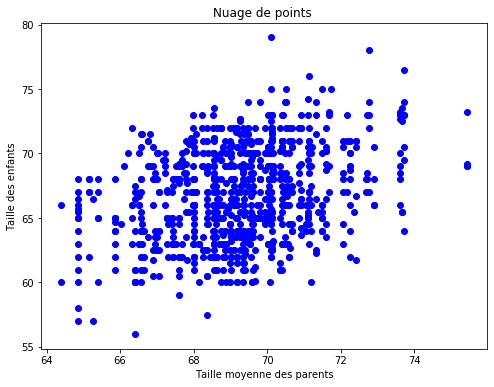

In [619]:
mean_parents = data[['MeanParents']]
height_child = data['Height']
title = 'Nuage de points '
xlabel = 'Taille moyenne des parents'
ylabel = 'Taille des enfants'
nuage_points = plot_nuage_points(mean_parents, height_child, None, None,
                                 None, None, xlabel, ylabel, title, False)

## 4 - Estimons θ 0 , θ 1 , par θ̂ 0 , θ̂ 1 en utilisant LinearRegression de sklearn

### 4-1 Définitions de quelques fonctions

In [620]:
def modele_lineaire_1d(X, y, intercept):
    modele = linear_model.LinearRegression(fit_intercept=intercept)
    modele.fit(X, y)
    return modele

La valeur estimée de θ0 est :  22.37620568300428
La valeur estimée de θ1 est :  0.6411903795908166


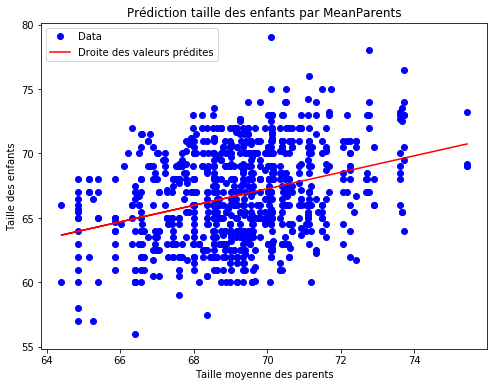

In [621]:
modele = modele_lineaire_1d(mean_parents, height_child, True)

#valeurs estimées de θ0  et θ1 
θ0 = modele.intercept_
θ1 = modele.coef_[0]
print('La valeur estimée de θ0 est : '+' '+str(θ0))
print('La valeur estimée de θ1 est : '+' '+str(θ1))

# Visualisation de des valeurs prédites yi et yi
height_predict = modele.predict(mean_parents)
xlabel = 'Taille moyenne des parents'
ylabel = 'Taille des enfants'
title = 'Prédiction taille des enfants par MeanParents'
nuage_points_predict = plot_nuage_points(mean_parents, height_child, None, None,
                                         mean_parents, height_predict, xlabel, ylabel, title, True)

## 5- Recentrage des données 

La valeur estimée de θ0 centré est :  0.0
La valeur estimée de θ1 centré est :  0.6411903795908166


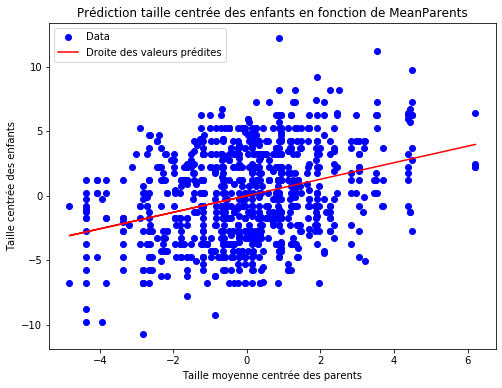

In [622]:
mean_parents_cent = data[['MeanParents']] - np.mean(data[['MeanParents']])
height_cent = data['Height'] - np.mean(data['Height'])
modele_centre = modele_lineaire_1d(mean_parents_cent, height_cent, False)

#valeurs estimées de θ0 centré et θ1 centré
θ0_centre = modele_centre.intercept_
θ1_centre = modele_centre.coef_[0]
print('La valeur estimée de θ0 centré est : '+' '+str(θ0_centre))
print('La valeur estimée de θ1 centré est : '+' '+str(θ1_centre))

# Visualisation de des valeurs prédites yi et yi
height_cent_predict = modele_centre.predict(mean_parents_cent)
xlabel = 'Taille moyenne centrée des parents'
ylabel = 'Taille centrée des enfants'
title = 'Prédiction taille centrée des enfants en fonction de MeanParents'
nuage_points_predict_cent = plot_nuage_points(mean_parents_cent, height_cent, None, None,
                                              mean_parents_cent, height_cent_predict, xlabel, ylabel, title, True)


θ1 =  θ1 centré, donc la prédiction effectuée dans le modèle centré est bien la même que la précédente.

## 6- Histogramme des résidus

### 6-1 fonction histogramme

In [623]:
def plt_histo(residus, residus2, label='Male'):
    fig = plt.figure(figsize=(8, 6))
    
    if residus2 is None:
        sns.distplot(residus, color = 'darkblue', hist = True, hist_kws={'edgecolor':'black'},
                 kde=True, kde_kws = {'color': 'red', 'lw': 2, 'label':label})
    
    if residus2 is not None:
        sns.distplot(residus, color = 'darkblue', hist = True, hist_kws={'edgecolor':'black'},
                 kde=True, kde_kws = {'color': 'blue', 'lw': 2, 'label':'Male'},)
        
        sns.distplot(residus2, color = 'darkblue', hist = True, hist_kws={'edgecolor':'black'},
                 kde=True, kde_kws = {'color': 'yellow', 'lw': 2, 'label':'Female'})
        
    plt.xlabel('Résidus')
    plt.ylabel('Fréquences')
    plt.legend(loc='upper left')
    plt.title('Histogramme des résidus')

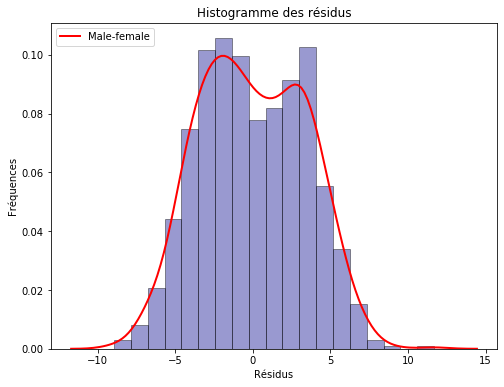

In [624]:
residus = height_child - modele.predict(mean_parents)
histogram = plt_histo(residus, None, 'Male-female')


La courbe de distribution des résidus (courbe rouge) n' est pas semblable à celle d'une loi normale.
Dans notre cas, l'hypothèse de normalité des résidus n'est pas crédible.

## 7 et 8 - Nuages de points (filles et garçons) / régression linéaire / régression Male

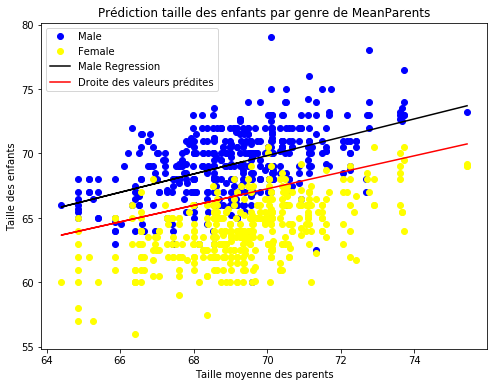

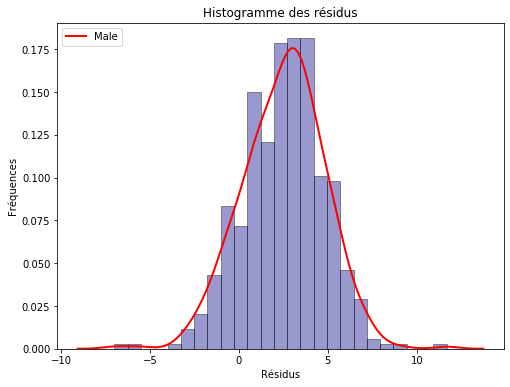

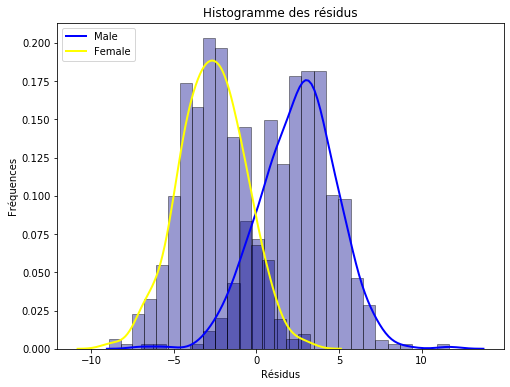

In [625]:
data_male = data[data['Gender'] == 'M'].copy()
data_female= data[data['Gender'] == 'F'].copy()

mean_male = data_male[['MeanParents']]
mean_female = data_female[['MeanParents']]

height_male= data_male['Height']
height_female= data_female['Height']

xlabel = 'Taille moyenne des parents'
ylabel = 'Taille des enfants'
title = 'Prédiction taille des enfants par genre de MeanParents'

nuage_points_male_female = plot_nuage_points(mean_male, height_male, mean_female, height_female,
                                              mean_parents, height_predict, xlabel, ylabel, title, True)

residus_male = height_male - modele.predict(mean_male)
residus_female = height_female - modele.predict(mean_female)
histogram_m = plt_histo(residus_male, None)
histogram_mf = plt_histo(residus_male, residus_female)


7-) En superposant ce graphe à celui obtenu précédemment, on constate que la fonction de densité des résidus 
(de la question 6) peut être décomposée en 2 gaussiennes. 

8-) Si on prédit la taille des enfants en se basant sur un genre (Male ou Female), l'hypothèse de normalité des résidus serait crédible.

## 9- Comparaison de prédicteurs

Modèle Global 

In [626]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(mean_parents, height_child, test_size=0.2)
model_global = linear_model.LinearRegression(fit_intercept=True)
model_global.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Modèle Male

In [627]:
X_train_m, X_test_m, y_train_m, y_test_m = model_selection.train_test_split(mean_male, height_male, test_size=0.2)
model_male = linear_model.LinearRegression(fit_intercept=True)
model_male.fit(X_train_m,y_train_m)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Modèle Female

In [628]:
X_train_f, X_test_f, y_train_f, y_test_f = model_selection.train_test_split(mean_female, height_female, test_size=0.2)
model_female = linear_model.LinearRegression(fit_intercept=True)
model_female.fit(X_train_f,y_train_f)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Risque de prédiction

In [629]:
risque_male_male = metrics.mean_squared_error(y_test_m, model_male.predict(X_test_m))
risque_global_male = metrics.mean_squared_error(y_test_m, model_global.predict(X_test_m))
print('Le risque de prédiction du modèle Male sur l echantillon test Male est: '+ ''+ str(round(risque_male_male, 3)))
print('Le risque de prédiction du modèle Global sur l echantillon test Male est: '+ ''+ str(round(risque_global_male, 3)))

Le risque de prédiction du modèle Male sur l echantillon test Male est: 4.563
Le risque de prédiction du modèle Global sur l echantillon test Male est: 11.393


On constate que le risque de prédiction du modèle "Male" sur l'echantillon test "Male" est moins élevé que celui du modèle
global sur le même échantillon.

## 10- Combinaison des 2 prédicteurs

In [630]:
#M = data[data['Gender'] == 'M']
#F= data[data['Gender'] == 'F']
#mean_male = data_male[['MeanParents']]
#mean_female = data_female[['MeanParents']]

mean = np.mean(data['Height'])
data_male['Predict_m'] = model_male.predict(mean_male)
data_male['Mean'] =  mean

data_female['Predict_m'] = model_female.predict(mean_female)
data_female['Mean'] = mean
data_con = pd.concat([data_male, data_female])

#risque combiné
risque_comb = metrics.mean_squared_error(data_con['Height'], data_con['Predict_m'])
print('Le risque de prédiction combiné des 2 modèles avec "MeanParents" est: '+ ''+ str(round(risque_comb, 3)))

# Coefficient de détermination
R2 = 1 - ((np.linalg.norm(data_con['Height'] - data_con['Predict_m']))**2/(np.linalg.norm(data_con['Height'] - data_con['Mean']))**2)
print('Le coefficient de détermination avec MeanParents est :' + '' + str(round(R2,3)))

Le risque de prédiction combiné des 2 modèles avec "MeanParents" est: 4.655
Le coefficient de détermination avec MeanParents est :0.637


## 11- Construire un prédicteur en encodant GENDER

Modèle gender Male

In [631]:
dummies = pd.get_dummies(data["Gender"])
data_dum = pd.concat([data, dummies], axis=1)

data_dum_male = data_dum[data_dum['Gender'] == 'M'].copy()
data_dum_female= data_dum[data_dum['Gender'] == 'F'].copy()

mean_male_2d = data_dum_male[['M', 'MeanParents']]
height_male_2d = data_dum_male[['Height']]

X_train_mg, X_test_mg, y_train_mg, y_test_mg = model_selection.train_test_split(mean_male_2d, height_male_2d, test_size=0.2)
model_male_2d = linear_model.LinearRegression(fit_intercept=True)
model_male_2d.fit(X_train_mg,y_train_mg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Modèle Female

In [632]:
mean_female_2d = data_dum_female[['M', 'MeanParents']]
height_female_2d = data_dum_female[['Height']]
X_train_fg, X_test_fg, y_train_fg, y_test_fg = model_selection.train_test_split(mean_female_2d, height_female_2d, test_size=0.2)
model_female_2d = linear_model.LinearRegression(fit_intercept=True)
model_female_2d.fit(X_train_fg,y_train_fg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Calcul du coefficient de détermination

In [633]:
mean_dum = np.mean(data_dum['Height'])
data_dum_male['Predict_2d'] = model_male_2d.predict(mean_male_2d)
data_dum_male['Mean'] =  mean_dum

data_dum_female['Predict_2d'] = model_female_2d.predict(mean_female_2d)
data_dum_female['Mean'] = mean
data_dum_conc = pd.concat([data_dum_male, data_dum_female])

R2_dum = 1 - ((np.linalg.norm(data_dum_conc['Height'] - data_dum_conc['Predict_2d']))**2/(np.linalg.norm(data_dum_conc['Height'] - data_dum_conc['Mean']))**2)
print('Le coefficient de détermination avec MeanParents est :' + '' + str(round(R2_dum,3)))

Le coefficient de détermination avec MeanParents est :0.637


On constate que le coefficient de determination du modèle avec les variables GENDER et MeanParents (R² = 0.636) est égal à celui
obtenu avec uniquement la variable MeanParents (R² = 0.637)

## 12-Régression avec les 2 variables explicatives(Father et Mother)

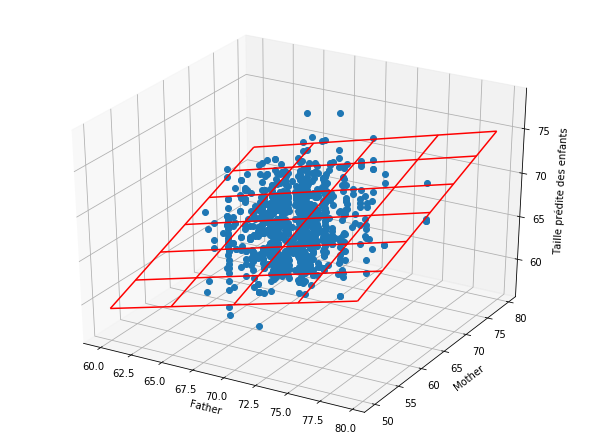

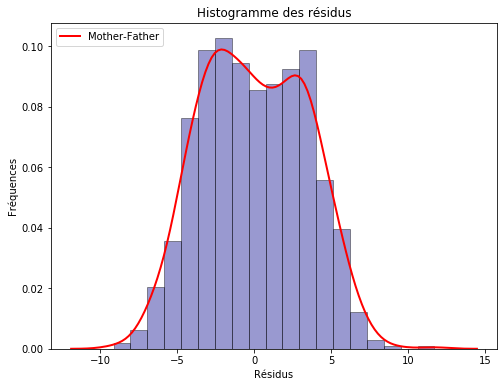

In [639]:
X = data[['Father', 'Mother']]
X = sm.add_constant(X)
y = data['Height']
model3D = sm.OLS(y, X).fit()
results = sm.OLS(y, X).fit().params
XX = np.arange(60, 80, 0.5)
YY = np.arange(50, 80, 0.5)
np.ptp(XX, axis=0)
np.ptp(YY, axis=0)
xx, yy = np.meshgrid(XX, YY)
zz = results[0] + results[1]*xx + results[2]*yy
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.plot(X['Father'],X['Mother'],y,'o')
ax.plot_wireframe(xx, yy, zz, rstride=10, cstride=10, color='red')
ax.set_xlabel('Father')
ax.set_ylabel('Mother')
ax.set_zlabel('Taille prédite des enfants')
plt.show()

y_pred = model3D.predict(X)
residus_3d = y - y_pred
#plt.hist(residus, edgecolor = 'black')
histogram_3d = plt_histo(residus_3d, None, 'Mother-Father')

On observe la même distribution des résidus que celle obtenue avec la variable MeanParents

## 13- Comparaison Modèle 2 variables à celui de MeanParents

Modèle 3d "Male"

In [635]:
#data_male = data[data['Gender'] == 'M']
#data_female= data[data['Gender'] == 'F']

mean_male_3d = data_male[['Father', 'Mother']]
height_male_3d = data_male[['Height']]

X_train_m_3d, X_test_m_3d, y_train_m_3d, y_test_m_3d = model_selection.train_test_split(mean_male_3d, height_male_3d, test_size=0.2)
model3D_m = sm.OLS(y_train_m_3d, X_train_m_3d).fit()

Modèle 3d "Female"

In [636]:
mean_female_3d = data_female[['Father', 'Mother']]
height_female_3d = data_female[['Height']]

X_train_f_3d, X_test_f_3d, y_train_f_3d, y_test_f_3d = model_selection.train_test_split(mean_female_3d, height_female_3d, test_size=0.2)
model3D_f = sm.OLS(y_train_f_3d, X_train_f_3d).fit()

In [637]:
mean = np.mean(data['Height'])
data_male['Predict_3d'] = model3D_m.predict(mean_male_3d)
data_male['Mean'] =  mean

data_female['Predict_3d'] = model3D_f.predict(mean_female_3d)
data_female['Mean'] = mean
data_conc_3d = pd.concat([data_male, data_female])

#risque combiné
risque_comb_3d = metrics.mean_squared_error(data_conc_3d['Height'], data_conc_3d['Predict_3d'])
print('Le risque de prédiction combiné des 2 modèles est: '+ ''+ str(round(risque_comb_3d, 3)))

Le risque de prédiction combiné des 2 modèles est: 4.845


On constate que le risque de prédiction obtenu avec les variables explicatives taille Father et Mother (Risque = 4.848) est presque identique
à celui obtenu avec uniquementla variable MeanParents (Risque = 4.657) (Question10)